In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Datasets of movies, ratings and cast csv

In [73]:
#load the movies and rating data
movies_df = pd.read_csv('movies_metadata.csv')
ratings_df = pd.read_csv('ratings_small.csv')
cast_df = pd.read_csv('cast.csv')

In [74]:
movies_df.head(4)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0


In [75]:
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182


In [76]:
cast_df.head(5)

,Unnamed: 0,movie_id,0,cast_id,character,credit_id,gender,id,name,order,profile_path
0,0,862,NaN,14.0,Woody (voice),52fe4284c3a36847f8024f95,2.0,31.0,Tom Hanks,0.0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,0,862,NaN,15.0,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2.0,12898.0,Tim Allen,1.0,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,0,862,NaN,16.0,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2.0,7167.0,Don Rickles,2.0,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,0,862,NaN,17.0,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2.0,12899.0,Jim Varney,3.0,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,0,862,NaN,18.0,Rex (voice),52fe4284c3a36847f8024fa5,2.0,12900.0,Wallace Shawn,4.0,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg


In [77]:
# Working with sample to prevent kernel breakdown due to very large dataset

In [78]:
cast_df_sample = cast_df.sample(n=1000, random_state=42)

In [79]:
#Utilize the most important features from the movie metadata
movies_df = movies_df[['id', 'revenue', 'runtime', 'status', 'vote_average', 'title', 'genres', 'original_language','overview','popularity', 'tagline'  ]]

In [80]:
# Renaming the id columns
movies_df.rename(columns={'id': 'movies_id'}, inplace=True)

### The genre column has a list of dictionary and it has to be unpacked and exploded to be able to work on it

In [81]:
# This column has list of dictionary and we have to unpack it to be able to work with this data
movies_df['genres']

0        [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1        [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2        [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3        [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                           [{'id': 35, 'name': 'Comedy'}]
                               ...                        
45461    [{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...
45462                        [{'id': 18, 'name': 'Drama'}]
45463    [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...
45464                                                   []
45465                                                   []
Name: genres, Length: 45466, dtype: object

In [82]:
movies_df['genres'][0]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [83]:
#eval function. It should actually be a list, not a str. This is how you know its stored in a json file
eval(movies_df['genres'][0])

[{'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 10751, 'name': 'Family'}]

In [84]:
movies_df['genres'] = movies_df['genres'].apply(lambda x: eval(x))

In [85]:
genre = movies_df[['genres', 'movies_id']]
genre.head()



,genres,movies_id
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357
4,"[{'id': 35, 'name': 'Comedy'}]",11862


In [86]:
genres_explode = genre.explode('genres')
genres_explode

,genres,movies_id
0,"{'id': 16, 'name': 'Animation'}",862
0,"{'id': 35, 'name': 'Comedy'}",862
0,"{'id': 10751, 'name': 'Family'}",862
1,"{'id': 12, 'name': 'Adventure'}",8844
1,"{'id': 14, 'name': 'Fantasy'}",8844
...,...,...
45463,"{'id': 28, 'name': 'Action'}",67758
45463,"{'id': 18, 'name': 'Drama'}",67758
45463,"{'id': 53, 'name': 'Thriller'}",67758
45464,NaN,227506


In [87]:
genres_undict = pd.concat([genres_explode.drop(['genres'], axis=1), genres_explode["genres"].apply(pd.Series)], axis=1)

In [88]:
# Exploding the dictionaries
genres_undict = genres_undict[['movies_id', 'name']]

In [89]:
# Now that we have succesfully exploded this dictionary columns, let's merge it back to the original data set.
movies_df_genre = pd.merge(movies_df, genres_undict, on = 'movies_id', how = 'left')


In [90]:
movies_df_genre = movies_df_genre.drop(columns='genres')

converting some columns that are originally supposed to be integer, but displaying as objects back to int.

In [91]:
#convert column from object to integer using python functions, I just learned this method using google
def to_numeric(data, column):
    '''
    to_numeric: function name
    data: pandas dataframe (movies_df)
    column: column that needs to be chanaged
    read more on pd.numeric documentation
    '''
    data[column] = pd.to_numeric(data[column], errors='coerce', downcast='integer')
    data = data.fillna(0)
    data[column] = data[column].astype(int)
    return data

In [92]:
# Id column converted to type integer
movies_df_genre = to_numeric(movies_df_genre, column='movies_id')

### Merging ratings_csv data and Movies_csv to one dataset

In [93]:
# Merging the ratings and movies dataset to look at the relationship on the key userid and movie_id
movies_df_genre_ratings = pd.merge(ratings_df, movies_df_genre, left_on='movieId', right_on='movies_id')

In [94]:
movies_ratings_cast_df = pd.merge(movies_df_genre_ratings, cast_df_sample, left_on='movieId', right_on='movie_id')


In [95]:
movies_ratings_cast_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'movies_id', 'revenue',
       'runtime', 'status', 'vote_average', 'title', 'original_language',
       'overview', 'popularity', 'tagline', 'name_x', 'Unnamed: 0', 'movie_id',
       '0', 'cast_id', 'character', 'credit_id', 'gender', 'id', 'name_y',
       'order', 'profile_path'],
      dtype='object')

In [96]:
movies_ratings_cast_df = movies_ratings_cast_df.drop(columns='movies_id')

In [97]:
movies_ratings_cast_df = movies_ratings_cast_df.drop(columns='movie_id')

In [98]:
#replace missing values to Unkown on 'status' column
movies_ratings_cast_df['status'] = movies_ratings_cast_df[['status']].fillna('Unknown')

In [99]:
#drop the timestamp column
movies_ratings_cast_df = movies_ratings_cast_df.drop(['timestamp'], axis=1)


### Ploting of ratings in the dataset to see frequencies in movie rating, that is the overall movies with its rating point

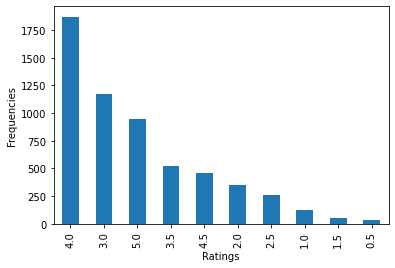

In [100]:
# plot of ratings and their frequencies in the data
movies_ratings_cast_df['rating'].value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Frequencies')
plt.show()

In [101]:
movies_ratings_cast_df.columns

Index(['userId', 'movieId', 'rating', 'revenue', 'runtime', 'status',
       'vote_average', 'title', 'original_language', 'overview', 'popularity',
       'tagline', 'name_x', 'Unnamed: 0', '0', 'cast_id', 'character',
       'credit_id', 'gender', 'id', 'name_y', 'order', 'profile_path'],
      dtype='object')

Further subsets of columns of interest

In [103]:
movies_ratings_cast_df = movies_ratings_cast_df[['userId', 'movieId', 'rating', 'revenue',
                                                'status', 'vote_average', 'title', 'original_language',
                                                'overview', 'popularity', 'tagline', 'name_x', 'cast_id',
                                                'character', 'gender', 'name_y']]

In [104]:
movies_ratings_cast_df = movies_ratings_cast_df.rename(columns={'name_x':'genre', 'name_y':'actor_name'})

movies_ratings_cast_df.head(5)

,userId,movieId,rating,revenue,status,vote_average,title,original_language,overview,popularity,tagline,genre,cast_id,character,gender,actor_name
0,2,272,3.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Action,36.0,Finch,2.0,Larry Holden
1,2,272,3.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Crime,36.0,Finch,2.0,Larry Holden
2,2,272,3.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Drama,36.0,Finch,2.0,Larry Holden
3,7,272,3.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Action,36.0,Finch,2.0,Larry Holden
4,7,272,3.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Crime,36.0,Finch,2.0,Larry Holden


### Highest and lowest rated movies:
I want to know if the language column contributed to high ratings of the movies

In [110]:
highest_rated_movies = movies_ratings_cast_df.loc[movies_ratings_cast_df['rating'] == 5.0]


In [111]:
highest_rated_movies.shape

(942, 16)

In [112]:
# The best rated movie is titled Batman Begins

highest_rated_movies.head(10)

,userId,movieId,rating,revenue,status,vote_average,title,original_language,overview,popularity,tagline,genre,cast_id,character,gender,actor_name
12,67,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Action,36.0,Finch,2.0,Larry Holden
13,67,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Crime,36.0,Finch,2.0,Larry Holden
14,67,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Drama,36.0,Finch,2.0,Larry Holden
27,119,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Action,36.0,Finch,2.0,Larry Holden
28,119,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Crime,36.0,Finch,2.0,Larry Holden
29,119,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Drama,36.0,Finch,2.0,Larry Holden
39,220,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Action,36.0,Finch,2.0,Larry Holden
40,220,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Crime,36.0,Finch,2.0,Larry Holden
41,220,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Drama,36.0,Finch,2.0,Larry Holden
57,391,272,5.0,374218673.0,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Action,36.0,Finch,2.0,Larry Holden


Dropping duplicates of the titled movies

In [113]:
highest_rated_movies.drop_duplicates(subset=['title'], inplace=True)

In [114]:
highest_rated_movies['popularity'].value_counts()

14.586087             1
10.996825999999999    1
10.989442             1
29.455314             1
28.505340999999998    1
19.10673              1
6.064954              1
11.066473             1
20.40426              1
2.9676720000000003    1
0.609931              1
16.646029000000002    1
15.321902             1
14.471373000000002    1
13.246795             1
12.477872             1
11.624866             1
8.552967              1
9.339316              1
8.369176              1
7.834351              1
6.933646              1
5.061725              1
4.42224               1
3.295206              1
2.6172720000000003    1
1.888149              1
2.0778689999999997    1
4.972236              1
10.627364             1
0.35565               1
7.857078              1
12.677592             1
14.430310999999998    1
36.629307             1
12.490891             1
6.218351              1
3.3605300000000002    1
11.267366             1
14.825586999999999    1
10.255315             1
20.477329       

In [115]:
# Id column converted to type integer
highest_rated_movies = to_numeric(highest_rated_movies, column='popularity')

#### Highest rated movies based on popularity

In [116]:

top_5 = highest_rated_movies.sort_values(by='popularity', ascending=False).head(5)

In [117]:
top_5

,userId,movieId,rating,revenue,status,vote_average,title,original_language,overview,popularity,tagline,genre,cast_id,character,gender,actor_name
5504,518,13,5.0,6.779454e+08,Released,8.2,Forrest Gump,en,A man with a low IQ has accomplished great thi...,48,"The world will never be the same, once you've ...",Comedy,113.0,Jenny's Father,0.0,Kevin Mangan
3300,487,22,5.0,6.550112e+08,Released,7.5,Pirates of the Caribbean: The Curse of the Bla...,en,"Jack Sparrow, a freewheeling 17th-century pira...",47,Prepare to be blown out of the water.,Adventure,1.0,Will Turner,2.0,Orlando Bloom
5483,564,240,5.0,4.754284e+07,Released,8.3,The Godfather: Part II,en,In the continuing saga of the Corleone crime f...,36,"I don't feel I have to wipe everybody out, Tom...",Drama,60.0,Policeman,2.0,Carmine Foresta
4651,28,58,5.0,1.065660e+09,Released,7.0,Pirates of the Caribbean: Dead Man's Chest,en,Captain Jack Sparrow works his way out of a bl...,29,Jack is back!,Adventure,57.0,Jimmy Legs,2.0,Christopher Adamson
12,67,272,5.0,3.742187e+08,Released,7.5,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28,Evil fears the knight.,Action,36.0,Finch,2.0,Larry Holden


In [118]:
top_5.shape

(5, 16)

### Best rated movies based on its original language in the dataset

<AxesSubplot:xlabel='original_language', ylabel='rating'>

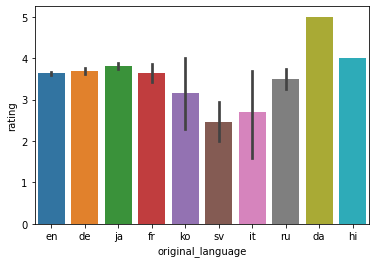

In [119]:
sns.barplot(data=movies_ratings_cast_df, x="original_language", y="rating")  

# Best rated movie in its original language is Danish.

### Best rated based on its genre

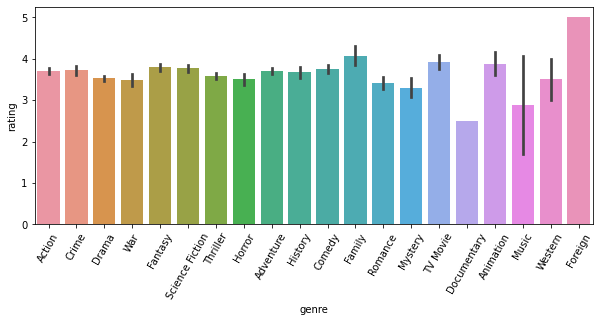

In [120]:
# Ratings generally for all the genre
plt.figure(figsize=(10,4))


ax = sns.barplot(data=movies_ratings_cast_df, x="genre", y="rating")
ax.set_xticklabels(ax.get_xticklabels(),rotation=60)
plt.show()

### Top 5 rated movies based on its genre and frequency

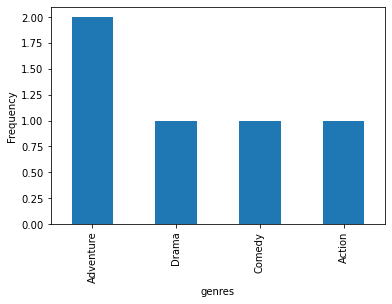

In [121]:
# plot top 5 rated movies based on its frequency,

top_5['genre'].value_counts().plot(kind='bar')
plt.xlabel('genres')
plt.ylabel('Frequency')
plt.show()

### Best and highly rated and popular actors that contributed to the high ratings in movies

In [122]:
# Top_5 actors you may know

best_rated_actors = list(top_5['actor_name'])
print(best_rated_actors)

['Kevin Mangan', 'Orlando Bloom', 'Carmine Foresta', 'Christopher Adamson', 'Larry Holden']


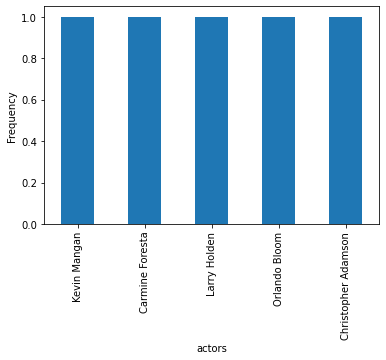

In [123]:
top_5['actor_name'].value_counts().plot(kind='bar')
plt.xlabel('actors')
plt.ylabel('Frequency')
plt.show()

### Worst Ratings

In [124]:
# Inspecting the ratings for the lowest ratings


Lowest_rating_movies = movies_ratings_cast_df['rating'].min()

Lowest_rating_movies

0.5

In [125]:
lowest_rating_movies = movies_ratings_cast_df.loc[movies_ratings_cast_df['rating'] == 0.5]

lowest_rating_movies.head(5)

,userId,movieId,rating,revenue,status,vote_average,title,original_language,overview,popularity,tagline,genre,cast_id,character,gender,actor_name
240,59,380,0.5,412800000.0,Released,7.6,Rain Man,en,Selfish yuppie Charlie Babbitt's father left a...,11.2675,A journey through understanding and fellowship.,Drama,10.0,Lenny,2.0,Ralph Seymour
904,187,1372,0.5,170877916.0,Released,7.4,Blood Diamond,en,An ex-mercenary turned smuggler. A Mende fishe...,12.4779,It will cost you everything.,Drama,31.0,Colonel Coetzee,2.0,Arnold Vosloo
905,187,1372,0.5,170877916.0,Released,7.4,Blood Diamond,en,An ex-mercenary turned smuggler. A Mende fishe...,12.4779,It will cost you everything.,Thriller,31.0,Colonel Coetzee,2.0,Arnold Vosloo
906,187,1372,0.5,170877916.0,Released,7.4,Blood Diamond,en,An ex-mercenary turned smuggler. A Mende fishe...,12.4779,It will cost you everything.,Action,31.0,Colonel Coetzee,2.0,Arnold Vosloo
937,332,1372,0.5,170877916.0,Released,7.4,Blood Diamond,en,An ex-mercenary turned smuggler. A Mende fishe...,12.4779,It will cost you everything.,Drama,31.0,Colonel Coetzee,2.0,Arnold Vosloo


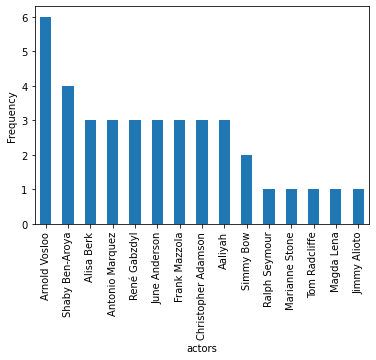

In [127]:
lowest_rating_movies['actor_name'].value_counts().plot(kind='bar')
plt.xlabel('actors')
plt.ylabel('Frequency')
plt.show()

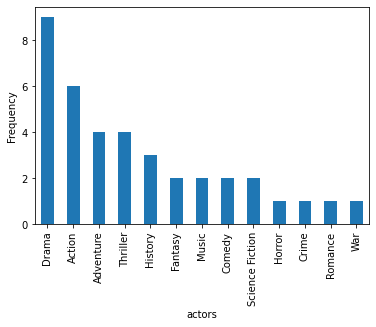

In [130]:
lowest_rating_movies['genre'].value_counts().plot(kind='bar')
plt.xlabel('actors')
plt.ylabel('Frequency')
plt.show()

Worst rated movie is titled Rain Man

In [131]:
lowest_rating_movies.head(5).sort_values(by='rating').head(1)

,userId,movieId,rating,revenue,status,vote_average,title,original_language,overview,popularity,tagline,genre,cast_id,character,gender,actor_name
240,59,380,0.5,412800000.0,Released,7.6,Rain Man,en,Selfish yuppie Charlie Babbitt's father left a...,11.2675,A journey through understanding and fellowship.,Drama,10.0,Lenny,2.0,Ralph Seymour


Ratings against genre

### Converting categorical values to numerical for linear regression relationship of different features against ratings

In [132]:
# I want to see the categorical columns to be able to convert it to numerical for linear regression relationships


obj_df = movies_ratings_cast_df.select_dtypes(include=['object']).copy()
obj_df.head()

# pd.get_dummies(data=df, columns=['A', 'B'])

,status,title,original_language,overview,popularity,tagline,genre,character,actor_name
0,Released,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Action,Finch,Larry Holden
1,Released,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Crime,Finch,Larry Holden
2,Released,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Drama,Finch,Larry Holden
3,Released,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Action,Finch,Larry Holden
4,Released,Batman Begins,en,"Driven by tragedy, billionaire Bruce Wayne ded...",28.5053,Evil fears the knight.,Crime,Finch,Larry Holden


##### Compute field relationship scores with the chosen statistical model.
###### Presenting findings in statistical summary and data visualizations ###



Looking at the relationship between original_language against ratings, that is, if this feature has impact with the high ratings

In [136]:
lan_x = pd.get_dummies(movies_ratings_cast_df[['original_language']])
#print(lan_x)

lan_x.drop(columns=['original_language_sv'], inplace=True)
#print(lan_x)

In [137]:
y = movies_ratings_cast_df[['rating']]

In [138]:
import statsmodels.api as sm

#X = movies_ratings_cast_df['rating']
#Y = movies_ratings_cast_df['original_language']

X = sm.add_constant(lan_x)
model = sm.OLS(y, lan_x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              8873.
Date:                Sun, 13 Dec 2020   Prob (F-statistic):                        0.00
Time:                        19:37:49   Log-Likelihood:                         -8150.8
No. Observations:                5808   AIC:                                  1.632e+04
Df Residuals:                    5799   BIC:                                  1.638e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
original_language_da     5.0000      0.569      8.789      0.000       3.885       6.115
original_language_de     3.6941      0.040     92.445      0.000       3.616       3.772
original_language_en     3.6313      0.015    246.096      0.000       3.602       3.660
original_language_fr     3.6410      0.112     32.636      0.000       3.422       3.860
original_language_hi     4.0000      0.493      8.119      0.000       3.034       4.966
original_language_it     2.7000      0.441      6.127      0.000       1.836       3.564
original_language_ja     3.8125      0.040     96.034      0.000       3.735       3.890
original_language_ko     3.1667      0.284     11.133      0.000       2.609       3.724
original_language_ru     3.5000      0.284     12.305      0.000       2.942       4.058
==============================================================================
Omnibus:                      344.930   Durbin-Watson:                   0.656
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.207
Skew:                          -0.628   Prob(JB):                     2.29e-89
Kurtosis:                       3.334   Cond. No.                         38.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Danish language is the most language which contributes to the highest ratings of the movies

original_language_da has the highest ratings with high coefficient

In [139]:
# Best rated genres

#highest_rated_movies_genre = movies_ratings_cast_df.loc[movies_ratings_cast_df['rating'] == 5.0]
#highest_rated_movies_genre.head(3)

In [140]:
genre_x = pd.get_dummies(movies_ratings_cast_df[['genre']])
#print(lan_x)

#lan_x.drop(columns=['original_language_sv'], inplace=True)
#print(lan_x)

X = sm.add_constant(genre_x, lan_x)
model = sm.OLS(y, genre_x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     5.536
Date:                Sun, 13 Dec 2020   Prob (F-statistic):           8.52e-14
Time:                        19:38:16   Log-Likelihood:                -8089.1
No. Observations:                5808   AIC:                         1.622e+04
Df Residuals:                    5788   BIC:                         1.635e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
genre_Action              3.7134      0.035    106.140      0.000       3.645       3.782
genre_Adventure           3.7124      0.039     94.651      0.000       3.636       3.789
genre_Animation           3.8750      0.135     28.635      0.000       3.610       4.140
genre_Comedy              3.7506      0.046     80.712      0.000       3.659       3.842
genre_Crime               3.7208      0.055     67.887      0.000       3.613       3.828
genre_Documentary         2.5000      0.976      2.562      0.010       0.587       4.413
genre_Drama               3.5246      0.030    118.479      0.000       3.466       3.583
genre_Family              4.0636      0.132     30.883      0.000       3.806       4.322
genre_Fantasy             3.7897      0.046     82.107      0.000       3.699       3.880
genre_Foreign             5.0000      0.976      5.124      0.000       3.087       6.913
genre_History             3.6701      0.070     52.787      0.000       3.534       3.806
genre_Horror              3.5029      0.074     47.214      0.000       3.357       3.648
genre_Music               2.8750      0.345      8.333      0.000       2.199       3.551
genre_Mystery             3.3022      0.102     32.281      0.000       3.102       3.503
genre_Romance             3.4083      0.075     45.405      0.000       3.261       3.555
genre_Science Fiction     3.7692      0.045     83.560      0.000       3.681       3.858
genre_TV Movie            3.9318      0.120     32.733      0.000       3.696       4.167
genre_Thriller            3.5845      0.037     97.462      0.000       3.512       3.657
genre_War                 3.4965      0.082     42.847      0.000       3.337       3.656
genre_Western             3.5000      0.690      5.072      0.000       2.147       4.853
==============================================================================
Omnibus:                      374.112   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              448.104
Skew:                          -0.665   Prob(JB):                     4.96e-98
Kurtosis:                       3.286   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [141]:
#movies_ratings_cast_df.columns

In [65]:
#pop_x = pd.get_dummies(movies_ratings_cast_df['popularity'],drop_first=True)
vote_x = pd.get_dummies(movies_ratings_cast_df['vote_average'],drop_first=True)
actor_x = pd.get_dummies(movies_ratings_cast_df['actor_name'], drop_first=True)
genre_x = pd.get_dummies(movies_ratings_cast_df['genre'], drop_first=True)

KeyError: 'actor_name'

In [66]:
#print(pop_x)

In [67]:
y = movies_ratings_cast_df[['rating']]

X = sm.add_constant(actor_x)
model = sm.OLS(y, actor_x)
results = model.fit()
results.summary()

NameError: name 'sm' is not defined